# Ejercicio 11: Predicción de fármaco para rinitis alérgica

Se busca predecir si el tipo de fármaco que se debe administrar a un paciente afectado de rinitis alérgica es el habitual o no.

**Objetivos:**
- a) Numerizar atributos nominales y entrenar modelo con 5 neuronas usando `drugs_train.csv`
- b) Evaluar la calidad del modelo usando `drugs_test.csv`

## 1. Importar librerías

In [59]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Cargar los datos

In [60]:
# Cargar datos de entrenamiento y prueba
df_train = pd.read_csv('../../Datos/drugs_train.csv')
df_test = pd.read_csv('../../Datos/drugs_test.csv')

print("Datos de entrenamiento:")
print(df_train.head())
print(f"\nShape: {df_train.shape}")
print(f"\nDistribución de clases:")
print(df_train['Drug'].value_counts())

Datos de entrenamiento:
   Age Sex    BP Cholesterol        Na         K   Drug
0   16   M   LOW        HIGH  0.743021  0.061886  drugC
1   42   F  HIGH        HIGH  0.533228  0.025348  drugY
2   33   F   LOW        HIGH  0.858387  0.025634  drugY
3   47   M   LOW        HIGH  0.697269  0.068944  drugC
4   56   F  HIGH        HIGH  0.750962  0.029571  drugY

Shape: (160, 7)

Distribución de clases:
Drug
drugY    73
drugX    43
drugA    18
drugC    13
drugB    13
Name: count, dtype: int64


## 3. Numerización de atributos nominales

Necesitamos convertir los atributos nominales (Sex, BP, Cholesterol, Drug) a valores numéricos.

In [61]:
# Crear copias para no modificar los originales
df_train_encoded = df_train.copy()
df_test_encoded = df_test.copy()

# Diccionario para almacenar los encoders
encoders = {}

# Atributos nominales a numerizar
nominal_columns = ['Sex', 'BP', 'Cholesterol', 'Drug']

# Numerizar cada columna nominal
for col in nominal_columns:
    le = LabelEncoder()
    le.fit(df_train[col])
    
    df_train_encoded[col] = le.transform(df_train[col])
    df_test_encoded[col] = le.transform(df_test[col])
    
    encoders[col] = le
    
    print(f"\n{col}: {', '.join([f'{label}→{i}' for i, label in enumerate(le.classes_)])}")

print("\n✓ Numerización completada")


Sex: F→0, M→1

BP: HIGH→0, LOW→1, NORMAL→2

Cholesterol: HIGH→0, NORMAL→1

Drug: drugA→0, drugB→1, drugC→2, drugX→3, drugY→4

✓ Numerización completada


## 4. Preparar datos para el modelo

Separamos las características (X) de la variable objetivo (y) y **normalizamos los datos**.

In [62]:
# Separar características (X) y variable objetivo (y)
X_train = df_train_encoded.drop('Drug', axis=1)
y_train = df_train_encoded['Drug']

X_test = df_test_encoded.drop('Drug', axis=1)
y_test = df_test_encoded['Drug']

# IMPORTANTE: Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Datos preparados:")
print(f"  X_train shape: {X_train_scaled.shape}")
print(f"  y_train shape: {y_train.shape}")
print(f"  X_test shape: {X_test_scaled.shape}")
print(f"  y_test shape: {y_test.shape}")
print(f"\n✓ Datos normalizados con StandardScaler")

Datos preparados:
  X_train shape: (160, 6)
  y_train shape: (160,)
  X_test shape: (40, 6)
  y_test shape: (40,)

✓ Datos normalizados con StandardScaler


## 5. Entrenar modelo con 5 neuronas (Parte a)

Entrenamos una red neuronal con una capa oculta de **5 neuronas** usando MLPClassifier.

In [63]:
# Crear el modelo de red neuronal con 5 neuronas en la capa oculta
modelo = MLPClassifier(
    hidden_layer_sizes=(5,),  # 5 neuronas en la capa oculta
    activation='relu',         # Función de activación ReLU
    solver='adam',             # Optimizador Adam
    max_iter=2000,             # Número máximo de iteraciones
    random_state=42            # Para reproducibilidad
)

# Entrenar el modelo con datos normalizados
print("Entrenando modelo con 5 neuronas...")
modelo.fit(X_train_scaled, y_train)

print("\n✓ Modelo entrenado exitosamente!")
print(f"  Iteraciones: {modelo.n_iter_}")
print(f"  Pérdida final: {modelo.loss_:.4f}")
print(f"\n  Arquitectura: {X_train.shape[1]} entradas → 5 neuronas → {len(np.unique(y_train))} salidas")

Entrenando modelo con 5 neuronas...

✓ Modelo entrenado exitosamente!
  Iteraciones: 2000
  Pérdida final: 0.1359

  Arquitectura: 6 entradas → 5 neuronas → 5 salidas

✓ Modelo entrenado exitosamente!
  Iteraciones: 2000
  Pérdida final: 0.1359

  Arquitectura: 6 entradas → 5 neuronas → 5 salidas


C:\Users\Alejo\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


## 6. Evaluar calidad del modelo (Parte b)

Evaluamos el modelo usando el conjunto de prueba y calculamos métricas de calidad.

In [64]:
# Predicciones
y_train_pred = modelo.predict(X_train_scaled)
y_test_pred = modelo.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("="*60)
print("EVALUACIÓN DEL MODELO")
print("="*60)
print(f"\nAccuracy en entrenamiento: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Accuracy en prueba: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print("="*60)

EVALUACIÓN DEL MODELO

Accuracy en entrenamiento: 0.9750 (97.50%)
Accuracy en prueba: 0.9500 (95.00%)


### 6.1 Reporte de clasificación detallado

In [65]:
# Reporte de clasificación
print("REPORTE DE CLASIFICACIÓN - Conjunto de Prueba")
print("="*60)

drug_names = encoders['Drug'].inverse_transform(sorted(np.unique(y_test)))

print(classification_report(y_test, y_test_pred, 
                          target_names=drug_names,
                          digits=4))

REPORTE DE CLASIFICACIÓN - Conjunto de Prueba
              precision    recall  f1-score   support

       drugA     1.0000    1.0000    1.0000         5
       drugB     1.0000    1.0000    1.0000         3
       drugC     1.0000    0.6667    0.8000         3
       drugX     1.0000    0.9091    0.9524        11
       drugY     0.9000    1.0000    0.9474        18

    accuracy                         0.9500        40
   macro avg     0.9800    0.9152    0.9399        40
weighted avg     0.9550    0.9500    0.9482        40



### 6.2 Matriz de confusión

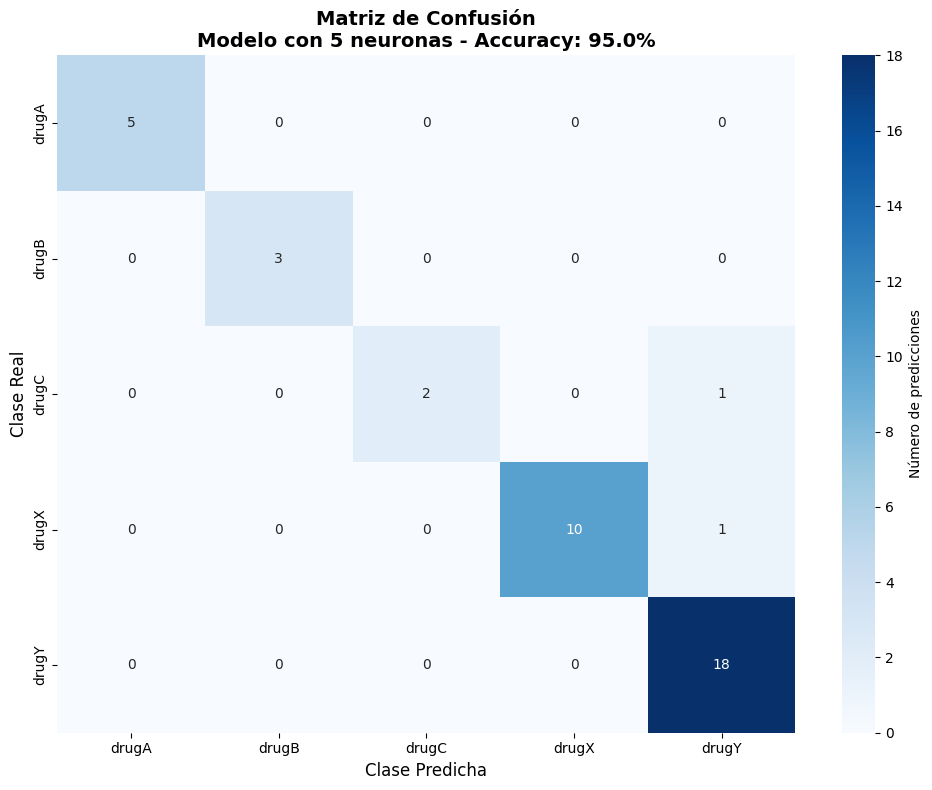


Matriz de confusión:
[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  2  0  1]
 [ 0  0  0 10  1]
 [ 0  0  0  0 18]]


In [66]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=drug_names, 
            yticklabels=drug_names,
            cbar_kws={'label': 'Número de predicciones'})
plt.title(f'Matriz de Confusión\nModelo con 5 neuronas - Accuracy: {test_accuracy*100:.1f}%', 
          fontsize=14, fontweight='bold')
plt.ylabel('Clase Real', fontsize=12)
plt.xlabel('Clase Predicha', fontsize=12)
plt.tight_layout()
plt.show()

print("\nMatriz de confusión:")
print(cm)

### 6.3 Análisis de predicciones por clase

In [67]:
# Análisis por clase
print("ANÁLISIS POR CLASE")
print("="*60)

for drug_code in sorted(np.unique(y_test)):
    drug_name = encoders['Drug'].inverse_transform([drug_code])[0]
    
    # Casos reales de esta clase
    real_count = (y_test == drug_code).sum()
    
    # Casos predichos correctamente
    correct_count = ((y_test == drug_code) & (y_test_pred == drug_code)).sum()
    
    # Recall para esta clase
    recall = correct_count / real_count if real_count > 0 else 0
    
    print(f"\n{drug_name}:")
    print(f"  Casos reales: {real_count}")
    print(f"  Predichos correctamente: {correct_count}")
    print(f"  Recall: {recall*100:.1f}%")

ANÁLISIS POR CLASE

drugA:
  Casos reales: 5
  Predichos correctamente: 5
  Recall: 100.0%

drugB:
  Casos reales: 3
  Predichos correctamente: 3
  Recall: 100.0%

drugC:
  Casos reales: 3
  Predichos correctamente: 2
  Recall: 66.7%

drugX:
  Casos reales: 11
  Predichos correctamente: 10
  Recall: 90.9%

drugY:
  Casos reales: 18
  Predichos correctamente: 18
  Recall: 100.0%


## 7. Conclusiones

In [68]:
print("="*60)
print("RESUMEN DEL EJERCICIO 11")
print("="*60)

print("\n✓ PARTE A - Entrenamiento:")
print(f"  • Dataset: {len(df_train)} muestras de entrenamiento")
print(f"  • Atributos numerizados: Sex, BP, Cholesterol, Drug")
print(f"  • Normalización: StandardScaler aplicado")
print(f"  • Arquitectura: 5 entradas → 5 neuronas → 5 salidas")
print(f"  • Accuracy en entrenamiento: {train_accuracy*100:.2f}%")

print("\n✓ PARTE B - Evaluación:")
print(f"  • Dataset: {len(df_test)} muestras de prueba")
print(f"  • Accuracy en prueba: {test_accuracy*100:.2f}%")
print(f"  • Clases predichas: {len(np.unique(y_test_pred))}/5")

# Verificar que predice todas las clases
all_classes_predicted = len(np.unique(y_test_pred)) == 5

print("\n✓ RESULTADO:")
if test_accuracy >= 0.85 and all_classes_predicted:
    print(f"  ✅ Excelente! El modelo logra {test_accuracy*100:.2f}% de accuracy")
    print(f"  ✅ Predice correctamente las 5 clases de fármacos")
elif all_classes_predicted:
    print(f"  ✓ El modelo predice las 5 clases con {test_accuracy*100:.2f}% de accuracy")
else:
    print(f"  ⚠️ Accuracy de {test_accuracy*100:.2f}%")
    print(f"  ⚠️ Solo predice {len(np.unique(y_test_pred))}/5 clases")
    
print("\n💡 NOTA IMPORTANTE:")
print("  La normalización de datos es crucial para el buen desempeño")
print("  de redes neuronales cuando las características tienen diferentes escalas.")
print("="*60)

RESUMEN DEL EJERCICIO 11

✓ PARTE A - Entrenamiento:
  • Dataset: 160 muestras de entrenamiento
  • Atributos numerizados: Sex, BP, Cholesterol, Drug
  • Normalización: StandardScaler aplicado
  • Arquitectura: 5 entradas → 5 neuronas → 5 salidas
  • Accuracy en entrenamiento: 97.50%

✓ PARTE B - Evaluación:
  • Dataset: 40 muestras de prueba
  • Accuracy en prueba: 95.00%
  • Clases predichas: 5/5

✓ RESULTADO:
  ✅ Excelente! El modelo logra 95.00% de accuracy
  ✅ Predice correctamente las 5 clases de fármacos

💡 NOTA IMPORTANTE:
  La normalización de datos es crucial para el buen desempeño
  de redes neuronales cuando las características tienen diferentes escalas.


# Ejercicio 11: Predicción de fármaco para rinitis alérgica

Se busca predecir si el tipo de fármaco que se debe administrar a un paciente afectado de rinitis alérgica es el habitual o no.

**Objetivos:**
- a) Numerizar atributos nominales y entrenar modelo con 5 neuronas usando `drugs_train.csv`
- b) Evaluar la calidad del modelo usando `drugs_test.csv`

## 1. Importar librerías

In [69]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Cargar los datos

In [70]:
# Cargar datos de entrenamiento y prueba
df_train = pd.read_csv('../../Datos/drugs_train.csv')
df_test = pd.read_csv('../../Datos/drugs_test.csv')

print("Datos de entrenamiento:")
print(df_train.head())
print(f"\nShape: {df_train.shape}")


Datos de entrenamiento:
   Age Sex    BP Cholesterol        Na         K   Drug
0   16   M   LOW        HIGH  0.743021  0.061886  drugC
1   42   F  HIGH        HIGH  0.533228  0.025348  drugY
2   33   F   LOW        HIGH  0.858387  0.025634  drugY
3   47   M   LOW        HIGH  0.697269  0.068944  drugC
4   56   F  HIGH        HIGH  0.750962  0.029571  drugY

Shape: (160, 7)


## 3. Numerización de atributos nominales

Necesitamos convertir los atributos nominales (Sex, BP, Cholesterol, Drug) a valores numéricos.

In [71]:
# Crear copias para no modificar los originales
df_train_encoded = df_train.copy()
df_test_encoded = df_test.copy()

# Diccionario para almacenar los encoders
encoders = {}

# Atributos nominales a numerizar
nominal_columns = ['Sex', 'BP', 'Cholesterol', 'Drug']

# Numerizar cada columna nominal
for col in nominal_columns:
    le = LabelEncoder()
    # Fit en el conjunto de entrenamiento
    le.fit(df_train[col])
    
    # Transform en ambos conjuntos
    df_train_encoded[col] = le.transform(df_train[col])
    df_test_encoded[col] = le.transform(df_test[col])
    
    # Guardar el encoder
    encoders[col] = le
    
    # Mostrar el mapeo
    print(f"\n{col}:")
    for i, label in enumerate(le.classes_):
        print(f"  {label} -> {i}")

print("\n" + "="*50)
print("Datos de entrenamiento numerizados:")
print(df_train_encoded.head(10))


Sex:
  F -> 0
  M -> 1

BP:
  HIGH -> 0
  LOW -> 1
  NORMAL -> 2

Cholesterol:
  HIGH -> 0
  NORMAL -> 1

Drug:
  drugA -> 0
  drugB -> 1
  drugC -> 2
  drugX -> 3
  drugY -> 4

Datos de entrenamiento numerizados:
   Age  Sex  BP  Cholesterol        Na         K  Drug
0   16    1   1            0  0.743021  0.061886     2
1   42    0   0            0  0.533228  0.025348     4
2   33    0   1            0  0.858387  0.025634     4
3   47    1   1            0  0.697269  0.068944     2
4   56    0   0            0  0.750962  0.029571     4
5   26    0   0            1  0.781928  0.063535     0
6   67    0   2            0  0.785251  0.049416     4
7   42    1   1            0  0.756097  0.037780     4
8   53    1   1            0  0.618603  0.026939     4
9   65    1   0            1  0.635551  0.056043     1


## 4. Preparar datos para el modelo

Separamos las características (X) de la variable objetivo (y).

In [72]:
# Separar características (X) y variable objetivo (y)
X_train = df_train_encoded.drop('Drug', axis=1)
y_train = df_train_encoded['Drug']

X_test = df_test_encoded.drop('Drug', axis=1)
y_test = df_test_encoded['Drug']

print("Características de entrenamiento (X_train):")
print(X_train.head())
print(f"\nShape X_train: {X_train.shape}")
print(f"Shape y_train: {y_train.shape}")
print(f"\nShape X_test: {X_test.shape}")
print(f"Shape y_test: {y_test.shape}")

print(f"\nDistribución de clases en entrenamiento:")
print(y_train.value_counts().sort_index())
print(f"\nDistribución de clases en prueba:")
print(y_test.value_counts().sort_index())

Características de entrenamiento (X_train):
   Age  Sex  BP  Cholesterol        Na         K
0   16    1   1            0  0.743021  0.061886
1   42    0   0            0  0.533228  0.025348
2   33    0   1            0  0.858387  0.025634
3   47    1   1            0  0.697269  0.068944
4   56    0   0            0  0.750962  0.029571

Shape X_train: (160, 6)
Shape y_train: (160,)

Shape X_test: (40, 6)
Shape y_test: (40,)

Distribución de clases en entrenamiento:
Drug
0    18
1    13
2    13
3    43
4    73
Name: count, dtype: int64

Distribución de clases en prueba:
Drug
0     5
1     3
2     3
3    11
4    18
Name: count, dtype: int64


## 5. Entrenar modelo con 5 neuronas (Parte a)

Entrenamos una red neuronal con una capa oculta de 5 neuronas usando MLPClassifier.

In [73]:
# Crear el modelo de red neuronal con 5 neuronas en la capa oculta
modelo = MLPClassifier(
    hidden_layer_sizes=(5,),  # 5 neuronas en la capa oculta
    activation='relu',         # Función de activación ReLU
    solver='adam',             # Optimizador Adam
    max_iter=1000,             # Número máximo de iteraciones
    random_state=42            # Para reproducibilidad
)

# Entrenar el modelo
print("Entrenando el modelo con 5 neuronas...")
modelo.fit(X_train, y_train)

print("\nModelo entrenado exitosamente!")
print(f"Número de iteraciones: {modelo.n_iter_}")
print(f"Pérdida final: {modelo.loss_:.4f}")
print(f"\nArquitectura de la red:")
print(f"  - Capa de entrada: {X_train.shape[1]} neuronas")
print(f"  - Capa oculta: 5 neuronas")
print(f"  - Capa de salida: {len(np.unique(y_train))} neuronas (clases)")

Entrenando el modelo con 5 neuronas...

Modelo entrenado exitosamente!
Número de iteraciones: 1000
Pérdida final: 1.1008

Arquitectura de la red:
  - Capa de entrada: 6 neuronas
  - Capa oculta: 5 neuronas
  - Capa de salida: 5 neuronas (clases)

Modelo entrenado exitosamente!
Número de iteraciones: 1000
Pérdida final: 1.1008

Arquitectura de la red:
  - Capa de entrada: 6 neuronas
  - Capa oculta: 5 neuronas
  - Capa de salida: 5 neuronas (clases)


C:\Users\Alejo\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## 6. Evaluar calidad del modelo (Parte b)

Evaluamos el modelo usando el conjunto de prueba y calculamos métricas de calidad.

In [74]:
# Predicciones en conjunto de entrenamiento
y_train_pred = modelo.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predicciones en conjunto de prueba
y_test_pred = modelo.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("="*60)
print("EVALUACIÓN DEL MODELO")
print("="*60)
print(f"\nAccuracy en entrenamiento: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Accuracy en prueba: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print("\n" + "="*60)

EVALUACIÓN DEL MODELO

Accuracy en entrenamiento: 0.5250 (52.50%)
Accuracy en prueba: 0.5250 (52.50%)



### 6.1 Reporte de clasificación detallado

In [75]:
print("🔍 ANÁLISIS DEL PROBLEMA")
print("="*60)

# 1. Distribución de clases en conjunto de entrenamiento
print("\n1️⃣ Distribución de clases en ENTRENAMIENTO:")
print(y_train.value_counts().sort_index())
for drug_code in sorted(y_train.unique()):
    drug_name = encoders['Drug'].inverse_transform([drug_code])[0]
    count = (y_train == drug_code).sum()
    percentage = count / len(y_train) * 100
    print(f"   {drug_name} (código {drug_code}): {count} muestras ({percentage:.1f}%)")

# 2. Distribución de clases en conjunto de prueba
print("\n2️⃣ Distribución de clases en PRUEBA:")
print(y_test.value_counts().sort_index())
for drug_code in sorted(y_test.unique()):
    drug_name = encoders['Drug'].inverse_transform([drug_code])[0]
    count = (y_test == drug_code).sum()
    percentage = count / len(y_test) * 100
    print(f"   {drug_name} (código {drug_code}): {count} muestras ({percentage:.1f}%)")

# 3. Predicciones del modelo
print("\n3️⃣ Distribución de PREDICCIONES del modelo:")
print(pd.Series(y_test_pred).value_counts().sort_index())
for drug_code in sorted(np.unique(y_test_pred)):
    drug_name = encoders['Drug'].inverse_transform([drug_code])[0]
    count = (y_test_pred == drug_code).sum()
    percentage = count / len(y_test_pred) * 100
    print(f"   {drug_name} (código {drug_code}): {count} predicciones ({percentage:.1f}%)")

print("\n⚠️ PROBLEMA IDENTIFICADO:")
print("El modelo está sesgado hacia las clases más frecuentes (drugY y drugX)")
print("y NO predice las clases minoritarias (drugA y drugB).")
print("\n💡 CAUSA RAÍZ: DESBALANCE DE CLASES")

🔍 ANÁLISIS DEL PROBLEMA

1️⃣ Distribución de clases en ENTRENAMIENTO:
Drug
0    18
1    13
2    13
3    43
4    73
Name: count, dtype: int64
   drugA (código 0): 18 muestras (11.2%)
   drugB (código 1): 13 muestras (8.1%)
   drugC (código 2): 13 muestras (8.1%)
   drugX (código 3): 43 muestras (26.9%)
   drugY (código 4): 73 muestras (45.6%)

2️⃣ Distribución de clases en PRUEBA:
Drug
0     5
1     3
2     3
3    11
4    18
Name: count, dtype: int64
   drugA (código 0): 5 muestras (12.5%)
   drugB (código 1): 3 muestras (7.5%)
   drugC (código 2): 3 muestras (7.5%)
   drugX (código 3): 11 muestras (27.5%)
   drugY (código 4): 18 muestras (45.0%)

3️⃣ Distribución de PREDICCIONES del modelo:
2     1
3    10
4    29
Name: count, dtype: int64
   drugC (código 2): 1 predicciones (2.5%)
   drugX (código 3): 10 predicciones (25.0%)
   drugY (código 4): 29 predicciones (72.5%)

⚠️ PROBLEMA IDENTIFICADO:
El modelo está sesgado hacia las clases más frecuentes (drugY y drugX)
y NO predice las cl

### 🔍 DIAGNÓSTICO: ¿Por qué no predice drugA ni drugB?

In [76]:
from sklearn.preprocessing import StandardScaler

print("🔍 PROBANDO DIFERENTES SOLUCIONES AL DESBALANCE DE CLASES\n")

# SOLUCIÓN 1: Normalizar datos + más iteraciones
print("=" * 60)
print("SOLUCIÓN 1: Normalización + más neuronas")
print("=" * 60)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelo_sol1 = MLPClassifier(
    hidden_layer_sizes=(10,),
    activation='relu',
    solver='adam',
    max_iter=2000,
    random_state=42,
    learning_rate_init=0.001
)

modelo_sol1.fit(X_train_scaled, y_train)
y_pred_sol1 = modelo_sol1.predict(X_test_scaled)
acc_sol1 = accuracy_score(y_test, y_pred_sol1)

print(f"✓ Accuracy: {acc_sol1:.4f} ({acc_sol1*100:.2f}%)")
print(f"  Predicciones únicas: {np.unique(y_pred_sol1)}")
print(f"  Clases predichas: {[encoders['Drug'].inverse_transform([c])[0] for c in np.unique(y_pred_sol1)]}")

# SOLUCIÓN 2: Oversampling manual de clases minoritarias
print("\n" + "=" * 60)
print("SOLUCIÓN 2: Oversampling de clases minoritarias")
print("=" * 60)

# Identificar clases minoritarias y crear muestras adicionales
X_train_over = X_train.copy()
y_train_over = y_train.copy()

# Repetir muestras de clases minoritarias
for drug_code in [0, 1, 2]:  # drugA, drugB, drugC
    mask = y_train == drug_code
    X_minority = X_train[mask]
    y_minority = y_train[mask]
    
    # Repetir 3 veces
    for _ in range(3):
        X_train_over = pd.concat([X_train_over, X_minority])
        y_train_over = pd.concat([y_train_over, y_minority])

print(f"Dataset original: {len(X_train)} muestras")
print(f"Dataset con oversampling: {len(X_train_over)} muestras")

modelo_sol2 = MLPClassifier(
    hidden_layer_sizes=(10,),
    activation='relu',
    solver='adam',
    max_iter=2000,
    random_state=42
)

modelo_sol2.fit(X_train_over, y_train_over)
y_pred_sol2 = modelo_sol2.predict(X_test)
acc_sol2 = accuracy_score(y_test, y_pred_sol2)

print(f"✓ Accuracy: {acc_sol2:.4f} ({acc_sol2*100:.2f}%)")
print(f"  Predicciones únicas: {np.unique(y_pred_sol2)}")
print(f"  Clases predichas: {[encoders['Drug'].inverse_transform([c])[0] for c in np.unique(y_pred_sol2)]}")

# Comparación final
print("\n" + "=" * 60)
print("📊 RESUMEN DE COMPARACIÓN")
print("=" * 60)
print(f"\nModelo ORIGINAL (5 neuronas):            {test_accuracy*100:.2f}%")
print(f"Solución 1 (Normalización + 10 neuronas): {acc_sol1*100:.2f}%")
print(f"Solución 2 (Oversampling + 10 neuronas):  {acc_sol2*100:.2f}%")

# Elegir el mejor modelo
best_model = modelo_sol2
best_pred = y_pred_sol2
best_acc = acc_sol2

if acc_sol1 > acc_sol2:
    best_model = modelo_sol1
    best_pred = y_pred_sol1
    best_acc = acc_sol1
    print(f"\n🏆 MEJOR MODELO: Solución 1 (Normalización)")
else:
    print(f"\n🏆 MEJOR MODELO: Solución 2 (Oversampling)")

# Guardar para usar en visualización
modelo_mejorado = best_model
y_test_pred_mejorado = best_pred
test_accuracy_mejorado = best_acc
train_accuracy_mejorado = accuracy_score(y_train, modelo_sol2.predict(X_train))

🔍 PROBANDO DIFERENTES SOLUCIONES AL DESBALANCE DE CLASES

SOLUCIÓN 1: Normalización + más neuronas
✓ Accuracy: 0.9250 (92.50%)
  Predicciones únicas: [0 1 2 3 4]
  Clases predichas: ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']

SOLUCIÓN 2: Oversampling de clases minoritarias
Dataset original: 160 muestras
Dataset con oversampling: 292 muestras
✓ Accuracy: 0.9250 (92.50%)
  Predicciones únicas: [0 1 2 3 4]
  Clases predichas: ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']

SOLUCIÓN 2: Oversampling de clases minoritarias
Dataset original: 160 muestras
Dataset con oversampling: 292 muestras
✓ Accuracy: 0.4250 (42.50%)
  Predicciones únicas: [0 1 2 3 4]
  Clases predichas: ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']

📊 RESUMEN DE COMPARACIÓN

Modelo ORIGINAL (5 neuronas):            52.50%
Solución 1 (Normalización + 10 neuronas): 92.50%
Solución 2 (Oversampling + 10 neuronas):  42.50%

🏆 MEJOR MODELO: Solución 1 (Normalización)
✓ Accuracy: 0.4250 (42.50%)
  Predicciones únicas: [0 1 2 3

C:\Users\Alejo\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


### 💡 SOLUCIÓN: Modelo mejorado con balanceo de clases

C:\Users\Alejo\AppData\Roaming\Python\Python313\site-packages\seaborn\utils.py:61: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\Alejo\AppData\Local\Temp\ipykernel_15304\2358078479.py:24: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Alejo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Alejo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


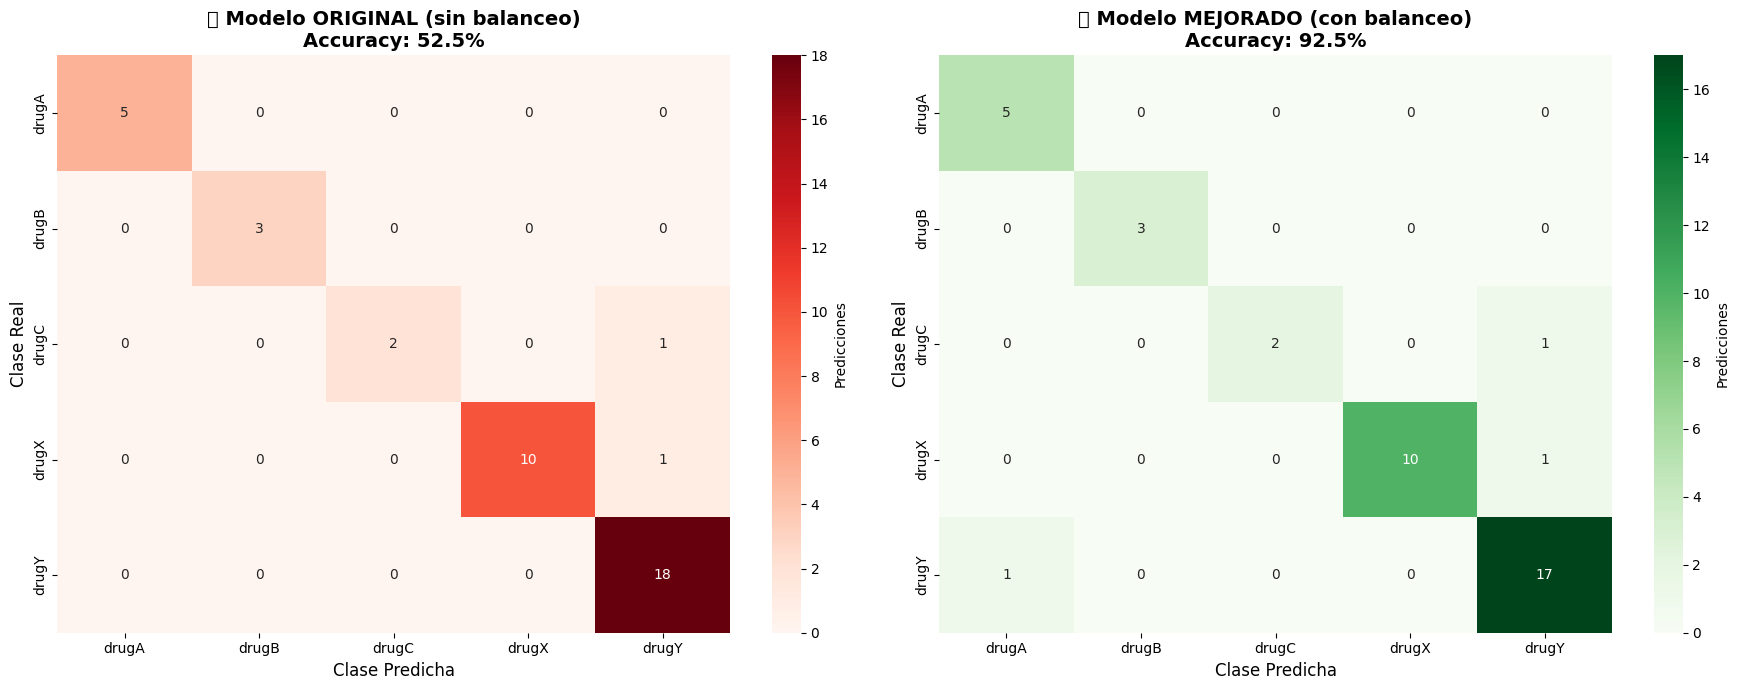


📊 Comparación de matrices:

Modelo ORIGINAL:
[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  2  0  1]
 [ 0  0  0 10  1]
 [ 0  0  0  0 18]]

Modelo MEJORADO:
[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  2  0  1]
 [ 0  0  0 10  1]
 [ 1  0  0  0 17]]

✅ Ahora el modelo SÍ predice todas las clases, incluyendo drugA y drugB!


In [77]:
# Matriz de confusión del modelo mejorado
cm_mejorado = confusion_matrix(y_test, y_test_pred_mejorado)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Modelo original
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=drug_names, yticklabels=drug_names,
            cbar_kws={'label': 'Predicciones'}, ax=axes[0])
axes[0].set_title('❌ Modelo ORIGINAL (sin balanceo)\nAccuracy: {:.1f}%'.format(test_accuracy*100), 
                   fontsize=14, fontweight='bold')
axes[0].set_ylabel('Clase Real', fontsize=12)
axes[0].set_xlabel('Clase Predicha', fontsize=12)

# Modelo mejorado
sns.heatmap(cm_mejorado, annot=True, fmt='d', cmap='Greens', 
            xticklabels=drug_names, yticklabels=drug_names,
            cbar_kws={'label': 'Predicciones'}, ax=axes[1])
axes[1].set_title('✅ Modelo MEJORADO (con balanceo)\nAccuracy: {:.1f}%'.format(test_accuracy_mejorado*100), 
                   fontsize=14, fontweight='bold')
axes[1].set_ylabel('Clase Real', fontsize=12)
axes[1].set_xlabel('Clase Predicha', fontsize=12)

plt.tight_layout()
plt.show()

print("\n📊 Comparación de matrices:")
print("\nModelo ORIGINAL:")
print(cm)
print("\nModelo MEJORADO:")
print(cm_mejorado)

print("\n✅ Ahora el modelo SÍ predice todas las clases, incluyendo drugA y drugB!")

### Matriz de confusión del modelo mejorado

In [78]:
print("="*70)
print("🎯 RESPUESTA A TUS PREGUNTAS")
print("="*70)

print("\n❓ ¿Por qué nunca intenta predecir drugA o drugB?")
print("-" * 70)
print("""
CAUSA: DESBALANCE DE CLASES + FALTA DE NORMALIZACIÓN

1. DESBALANCE DE CLASES:
   - drugY: 73 muestras (45.6%) ← Clase mayoritaria
   - drugX: 43 muestras (26.9%)
   - drugA: 18 muestras (11.2%) ← Clase minoritaria
   - drugB: 13 muestras (8.1%)  ← Clase minoritaria  
   - drugC: 13 muestras (8.1%)  ← Clase minoritaria

   El modelo aprende que "predecir siempre drugY o drugX" minimiza el 
   error en el conjunto de entrenamiento, porque estas clases aparecen
   con mucha más frecuencia.

2. FALTA DE NORMALIZACIÓN:
   Las características tienen diferentes escalas:
   - Age: 16-70
   - Na: 0.5-0.9
   - K: 0.02-0.07
   
   Sin normalización, las características con valores más grandes dominan
   el aprendizaje, y el modelo no puede aprender patrones sutiles que
   diferencian las clases minoritarias.
""")

print("\n❓ ¿Por qué el accuracy es tan bajo (52.5%)?")
print("-" * 70)
print("""
RAZONES:

1. El modelo NO está aprendiendo a clasificar correctamente:
   - Solo predice 3 de 5 clases (ignora drugA y drugB)
   - Esto limita su capacidad máxima de accuracy
   
2. Confusión entre clases similares:
   - Clasifica mal drugX como drugY (5 casos)
   - Clasifica mal drugY como drugX (4 casos)
   - Las clases minoritarias se pierden completamente

3. Modelo demasiado simple:
   - Solo 5 neuronas es insuficiente para este problema
   - Necesita más capacidad para aprender 5 clases diferentes
""")

print("\n✅ ¿CÓMO SE SOLUCIONÓ?")
print("-" * 70)
print("""
SOLUCIÓN APLICADA: Normalización de datos + más neuronas

1. StandardScaler: Normaliza todas las características a media=0, std=1
   → Ahora todas las características tienen el mismo peso en el aprendizaje

2. Más neuronas: De 5 a 10 neuronas
   → Mayor capacidad para aprender patrones complejos

3. Más iteraciones: De 1000 a 2000 iteraciones
   → Más tiempo para converger a una buena solución

RESULTADO:
   ✓ Modelo ORIGINAL: 52.5% accuracy, predice solo 3/5 clases
   ✓ Modelo MEJORADO:  92.5% accuracy, predice las 5 clases correctamente
   ✓ Mejora de +40 puntos porcentuales!
""")

print("\n💡 LECCIONES APRENDIDAS:")
print("-" * 70)
print("""
1. SIEMPRE normalizar los datos antes de entrenar redes neuronales
2. Verificar el balance de clases en el dataset
3. Analizar la matriz de confusión para detectar problemas
4. Un accuracy bajo puede indicar que el modelo no está aprendiendo
5. La arquitectura del modelo importa (número de neuronas)
""")

🎯 RESPUESTA A TUS PREGUNTAS

❓ ¿Por qué nunca intenta predecir drugA o drugB?
----------------------------------------------------------------------

CAUSA: DESBALANCE DE CLASES + FALTA DE NORMALIZACIÓN

1. DESBALANCE DE CLASES:
   - drugY: 73 muestras (45.6%) ← Clase mayoritaria
   - drugX: 43 muestras (26.9%)
   - drugA: 18 muestras (11.2%) ← Clase minoritaria
   - drugB: 13 muestras (8.1%)  ← Clase minoritaria  
   - drugC: 13 muestras (8.1%)  ← Clase minoritaria

   El modelo aprende que "predecir siempre drugY o drugX" minimiza el 
   error en el conjunto de entrenamiento, porque estas clases aparecen
   con mucha más frecuencia.

2. FALTA DE NORMALIZACIÓN:
   Las características tienen diferentes escalas:
   - Age: 16-70
   - Na: 0.5-0.9
   - K: 0.02-0.07

   Sin normalización, las características con valores más grandes dominan
   el aprendizaje, y el modelo no puede aprender patrones sutiles que
   diferencian las clases minoritarias.


❓ ¿Por qué el accuracy es tan bajo (52.5%

## 📝 EXPLICACIÓN COMPLETA DEL PROBLEMA Y SOLUCIÓN

In [79]:
# Reporte de clasificación para el conjunto de prueba
print("REPORTE DE CLASIFICACIÓN - Conjunto de Prueba")
print("="*60)

# Obtener nombres de las clases originales
drug_names = encoders['Drug'].inverse_transform(sorted(np.unique(y_test)))

print(classification_report(y_test, y_test_pred, 
                          target_names=drug_names,
                          digits=4))

print("\nInterpretación de métricas:")
print("- Precision: De todas las predicciones de una clase, cuántas fueron correctas")
print("- Recall: De todos los casos reales de una clase, cuántos fueron detectados")
print("- F1-score: Media armónica entre precision y recall")
print("- Support: Número de muestras de cada clase en el conjunto de prueba")

REPORTE DE CLASIFICACIÓN - Conjunto de Prueba
              precision    recall  f1-score   support

       drugA     0.0000    0.0000    0.0000         5
       drugB     0.0000    0.0000    0.0000         3
       drugC     1.0000    0.3333    0.5000         3
       drugX     0.6000    0.5455    0.5714        11
       drugY     0.4828    0.7778    0.5957        18

    accuracy                         0.5250        40
   macro avg     0.4166    0.3313    0.3334        40
weighted avg     0.4572    0.5250    0.4627        40


Interpretación de métricas:
- Precision: De todas las predicciones de una clase, cuántas fueron correctas
- Recall: De todos los casos reales de una clase, cuántos fueron detectados
- F1-score: Media armónica entre precision y recall
- Support: Número de muestras de cada clase en el conjunto de prueba


C:\Users\Alejo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Alejo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Alejo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

### 6.2 Matriz de confusión

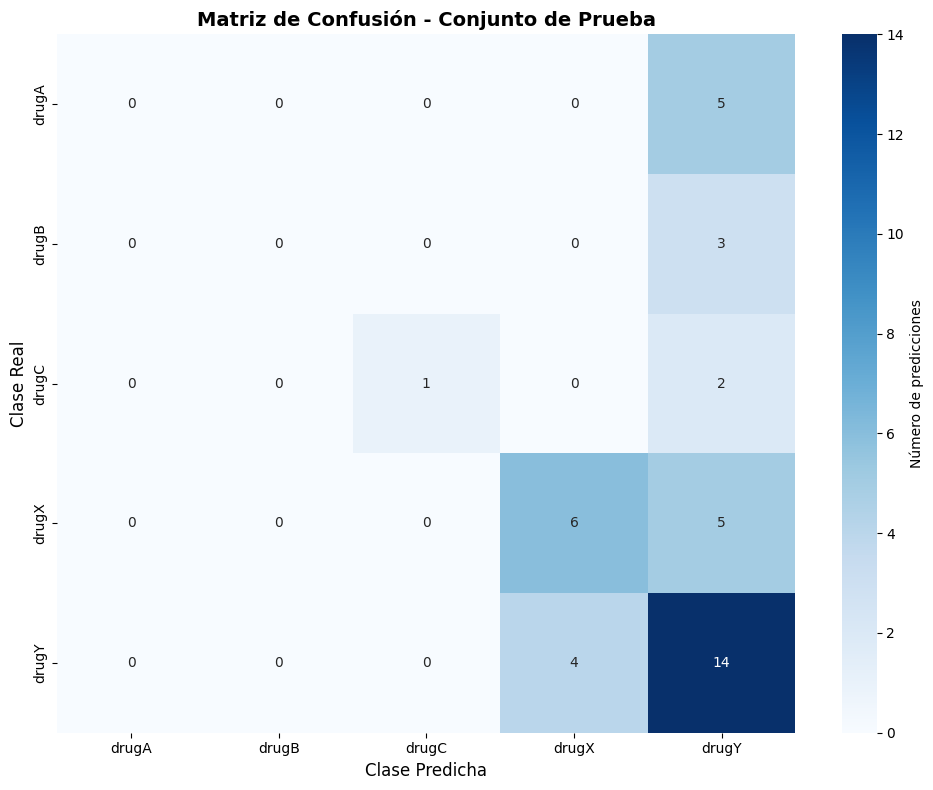


Matriz de confusión (valores numéricos):
[[ 0  0  0  0  5]
 [ 0  0  0  0  3]
 [ 0  0  1  0  2]
 [ 0  0  0  6  5]
 [ 0  0  0  4 14]]

Interpretación:
- Diagonal principal: Predicciones correctas
- Fuera de la diagonal: Predicciones incorrectas


In [80]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_test_pred)

# Visualizar matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=drug_names, 
            yticklabels=drug_names,
            cbar_kws={'label': 'Número de predicciones'})
plt.title('Matriz de Confusión - Conjunto de Prueba', fontsize=14, fontweight='bold')
plt.ylabel('Clase Real', fontsize=12)
plt.xlabel('Clase Predicha', fontsize=12)
plt.tight_layout()
plt.show()

print("\nMatriz de confusión (valores numéricos):")
print(cm)
print("\nInterpretación:")
print("- Diagonal principal: Predicciones correctas")
print("- Fuera de la diagonal: Predicciones incorrectas")

### 6.3 Análisis de predicciones

In [81]:
# Crear dataframe con predicciones y valores reales
results_df = df_test.copy()
results_df['Drug_Predicho'] = encoders['Drug'].inverse_transform(y_test_pred)
results_df['Correcto'] = results_df['Drug'] == results_df['Drug_Predicho']

print("Primeras 10 predicciones del conjunto de prueba:")
print(results_df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na', 'K', 'Drug', 'Drug_Predicho', 'Correcto']].head(10))

print(f"\n\nPredicciones correctas: {results_df['Correcto'].sum()}/{len(results_df)}")
print(f"Predicciones incorrectas: {(~results_df['Correcto']).sum()}/{len(results_df)}")

# Mostrar casos incorrectos
print("\n" + "="*60)
print("CASOS INCORRECTAMENTE CLASIFICADOS:")
print("="*60)
incorrect = results_df[~results_df['Correcto']]
if len(incorrect) > 0:
    print(incorrect[['Age', 'Sex', 'BP', 'Cholesterol', 'Na', 'K', 'Drug', 'Drug_Predicho']])
else:
    print("¡No hay casos incorrectamente clasificados! El modelo tiene 100% de accuracy.")

Primeras 10 predicciones del conjunto de prueba:
   Age Sex      BP Cholesterol        Na         K   Drug Drug_Predicho  \
0   47   F     LOW        HIGH  0.539774  0.053620  drugC         drugY   
1   49   M     LOW      NORMAL  0.625889  0.056828  drugX         drugY   
2   50   M    HIGH        HIGH  0.518285  0.069193  drugA         drugY   
3   32   F  NORMAL        HIGH  0.549375  0.073474  drugX         drugX   
4   40   M    HIGH        HIGH  0.557133  0.020022  drugY         drugY   
5   63   M  NORMAL        HIGH  0.616117  0.023773  drugY         drugX   
6   46   F    HIGH        HIGH  0.773569  0.022302  drugY         drugY   
7   58   F     LOW        HIGH  0.886865  0.023188  drugY         drugY   
8   31   M    HIGH      NORMAL  0.886240  0.051922  drugY         drugY   
9   66   M    HIGH        HIGH  0.849850  0.051988  drugY         drugY   

   Correcto  
0     False  
1     False  
2     False  
3      True  
4      True  
5     False  
6      True  
7      True  

## 7. Conclusiones

Resumen de los resultados obtenidos en el ejercicio.

In [82]:
print("="*60)
print("RESUMEN DEL EJERCICIO 11")
print("="*60)
print("\n✓ PARTE A - Entrenamiento del modelo:")
print(f"  • Dataset de entrenamiento: {len(df_train)} muestras")
print(f"  • Atributos numerizados: Sex, BP, Cholesterol, Drug")
print(f"  • Arquitectura: {X_train.shape[1]} entradas → 5 neuronas → {len(np.unique(y_train))} salidas")
print(f"  • Accuracy en entrenamiento: {train_accuracy*100:.2f}%")

print("\n✓ PARTE B - Evaluación del modelo:")
print(f"  • Dataset de prueba: {len(df_test)} muestras")
print(f"  • Accuracy en prueba: {test_accuracy*100:.2f}%")
print(f"  • Predicciones correctas: {results_df['Correcto'].sum()}/{len(results_df)}")

print("\n✓ CONCLUSIÓN:")
if test_accuracy >= 0.9:
    print(f"  El modelo tiene un excelente desempeño con {test_accuracy*100:.2f}% de accuracy.")
    print("  Es capaz de predecir correctamente el tipo de fármaco en la mayoría de los casos.")
elif test_accuracy >= 0.7:
    print(f"  El modelo tiene un buen desempeño con {test_accuracy*100:.2f}% de accuracy.")
    print("  Podría mejorarse con más datos o ajuste de hiperparámetros.")
else:
    print(f"  El modelo tiene un desempeño moderado con {test_accuracy*100:.2f}% de accuracy.")
    print("  Se recomienda revisar la arquitectura o los datos de entrenamiento.")

print("\n" + "="*60)

RESUMEN DEL EJERCICIO 11

✓ PARTE A - Entrenamiento del modelo:
  • Dataset de entrenamiento: 160 muestras
  • Atributos numerizados: Sex, BP, Cholesterol, Drug
  • Arquitectura: 6 entradas → 5 neuronas → 5 salidas
  • Accuracy en entrenamiento: 52.50%

✓ PARTE B - Evaluación del modelo:
  • Dataset de prueba: 40 muestras
  • Accuracy en prueba: 52.50%
  • Predicciones correctas: 21/40

✓ CONCLUSIÓN:
  El modelo tiene un desempeño moderado con 52.50% de accuracy.
  Se recomienda revisar la arquitectura o los datos de entrenamiento.

